In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-london-scikit-learn/trainLabels.csv
/kaggle/input/data-science-london-scikit-learn/train.csv
/kaggle/input/data-science-london-scikit-learn/test.csv


# 1. Первый взгляд на данные

In [2]:
# не читаем заголовки
# здесь отдельные файлы для признаков и таргета 
X_train = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/train.csv', header=None)
X_test = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/test.csv', header=None)
# сразу переименуем столбец с целевой переменной
y_train = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/trainLabels.csv', names=['label'], header=None)

# создадим df_train и df_test для удобства работы
df_train = X_train.join(y_train)
df_test = X_test

In [3]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050,1
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0


In [4]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [5]:
# все признаки количественные
df_train.info()
print('-' * 100)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [6]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451,0.51000
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439,0.50015
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086,0.00000
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041,0.00000
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944,1.00000
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193,1.00000
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984,1.00000


In [7]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.011814,0.004261,-0.001708,0.008614,1.262429,0.006003,0.480585,-0.017228,0.006883,-0.006664,...,-0.018914,0.007282,-0.476895,0.016175,-0.508713,-0.002295,0.451234,-0.002042,-1.003258,0.539873
std,1.009514,1.011432,0.996685,0.989010,4.527492,0.999623,2.102394,2.204673,0.989207,0.991570,...,1.003450,1.003326,2.202519,1.015779,2.097448,1.008415,2.187677,1.000152,1.979629,2.011646
min,-3.568633,-4.238067,-3.587473,-3.646144,-17.296514,-3.500646,-9.157707,-7.867021,-4.037177,-3.666707,...,-4.545617,-3.914329,-8.510309,-4.702577,-8.860839,-3.579675,-9.034930,-3.820679,-8.174851,-7.945400
25%,-0.669886,-0.678792,-0.665240,-0.662560,-1.669099,-0.688766,-0.894049,-1.521762,-0.654169,-0.665439,...,-0.689220,-0.664532,-1.986040,-0.673810,-1.908190,-0.689363,-1.071005,-0.667359,-2.293291,-0.717376
50%,0.006104,0.010758,0.007384,0.009027,1.123982,0.011476,0.534536,-0.021020,-0.006291,-0.005408,...,-0.033990,-0.003370,-0.459278,0.013170,-0.481508,-0.000858,0.419585,-0.003255,-1.004007,0.637040
75%,0.703350,0.684755,0.658111,0.683506,4.002391,0.690966,1.890960,1.460165,0.676678,0.654349,...,0.655757,0.682167,1.026158,0.691832,0.957351,0.666330,1.938350,0.667539,0.321595,1.897324
max,3.843549,3.538868,3.716102,3.667817,20.551947,4.565496,7.882210,7.391208,3.706671,3.322649,...,3.624639,4.251316,8.598575,4.157051,6.851583,3.911722,8.624332,3.860112,7.125848,9.464492


In [8]:
# пропусков нет
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

In [9]:
# дубликатов нет
df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

# 2. EDA и первичная обработка данных

In [4]:
# классы целевой переменной сбалансированы
y_train.value_counts()

label
1        510
0        490
Name: count, dtype: int64

In [11]:
# низкая корреляция целевой переменной с остальными
df_train.corr(numeric_only=True)['label'].abs().sort_values(ascending=False)

label    1.000000
14       0.476171
12       0.460738
18       0.289508
39       0.264656
6        0.252976
34       0.236116
36       0.231733
32       0.227027
28       0.207949
23       0.172938
4        0.150652
11       0.075276
20       0.075135
26       0.064633
15       0.060556
33       0.053928
1        0.052153
22       0.046953
19       0.046036
7        0.040523
37       0.039376
8        0.037534
25       0.036663
0        0.028058
9        0.026841
27       0.019778
38       0.019690
21       0.018645
13       0.018214
17       0.018021
24       0.017121
30       0.015797
5        0.015151
35       0.012533
31       0.012458
16       0.012234
29       0.012022
10       0.010233
3        0.007439
2        0.005618
Name: label, dtype: float64

In [12]:
# различные признаки также имеют низкую корреляцию друг с другом
# с учетом того, что всего в df_train 41 столбец
(df_train.corr(numeric_only=True).abs() > 0.6).sum().sum()

43

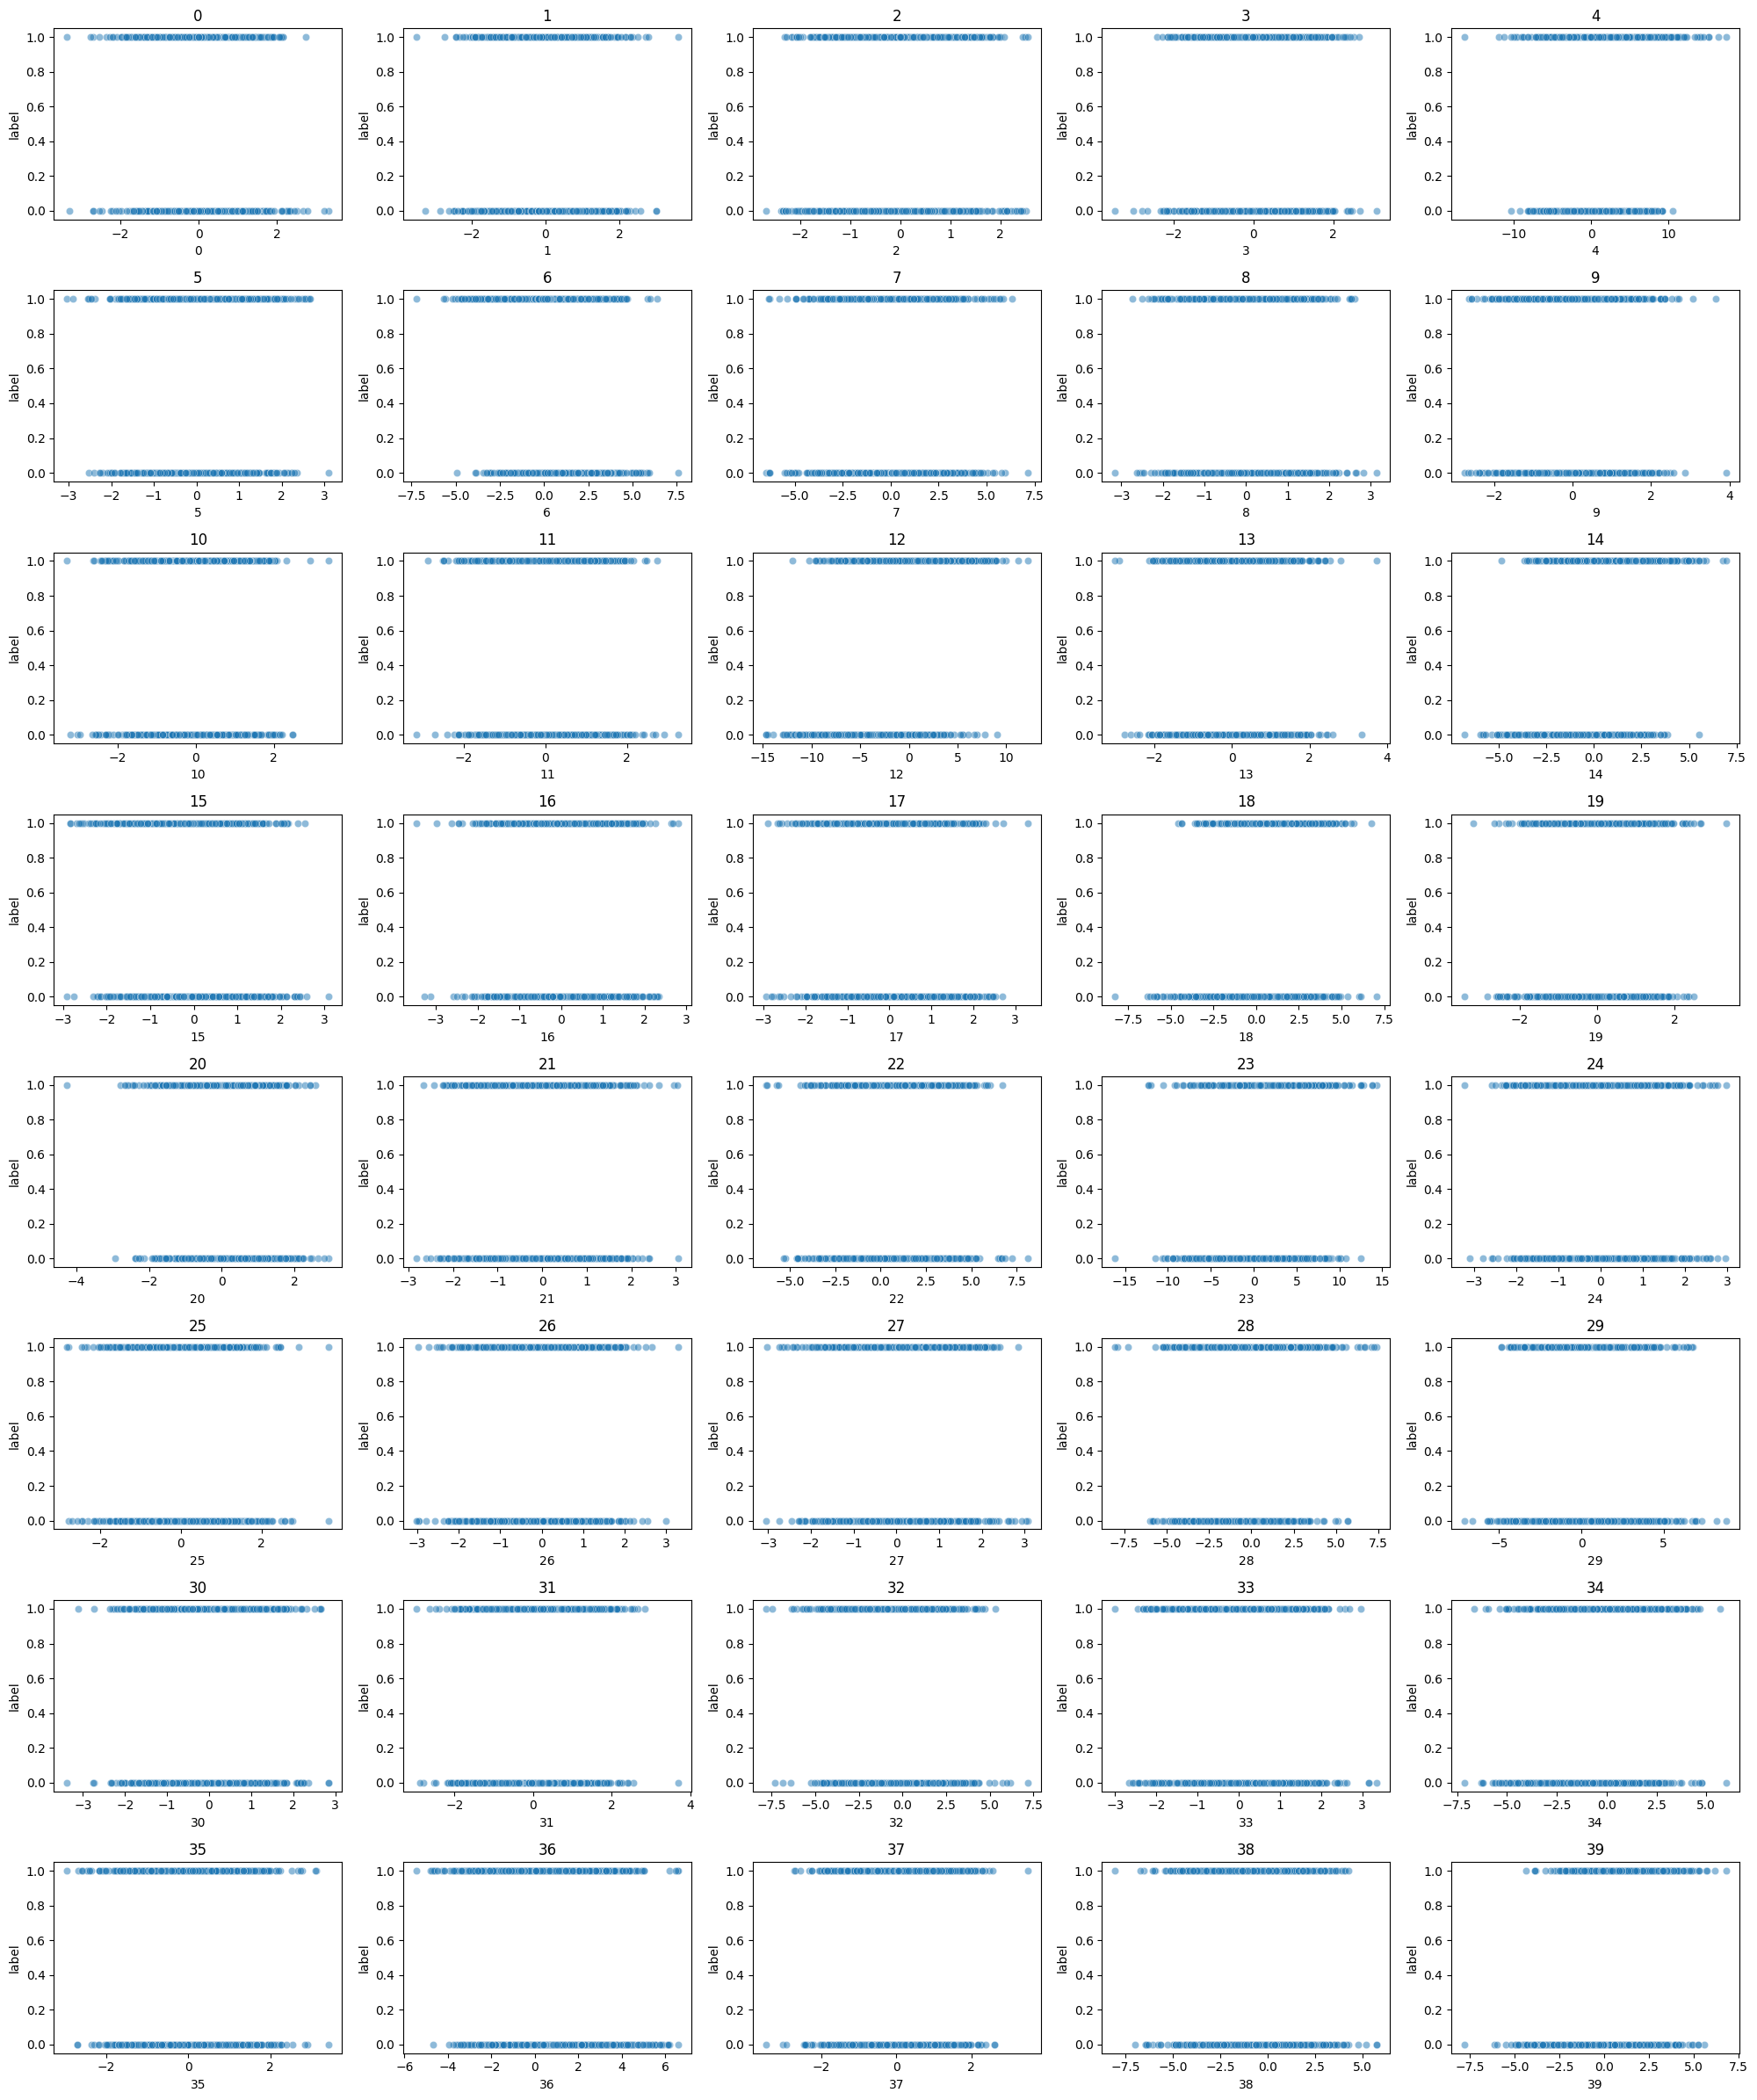

In [13]:
# оценим визуально зависимость целевой переменной от количественных признаков
def num_features_vis(X):
    fig, ax = plt.subplots(8, 5, figsize=(20, 24))
    ax = ax.flatten()
    for i, col in enumerate(X.drop(columns='label').columns):
        sns.scatterplot(x=X[col], y=X['label'], ax=ax[i], alpha=0.5);
        ax[i].set_title(col)

    plt.tight_layout()


num_features_vis(df_train)
# scatterplot в данном случае не информативны

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

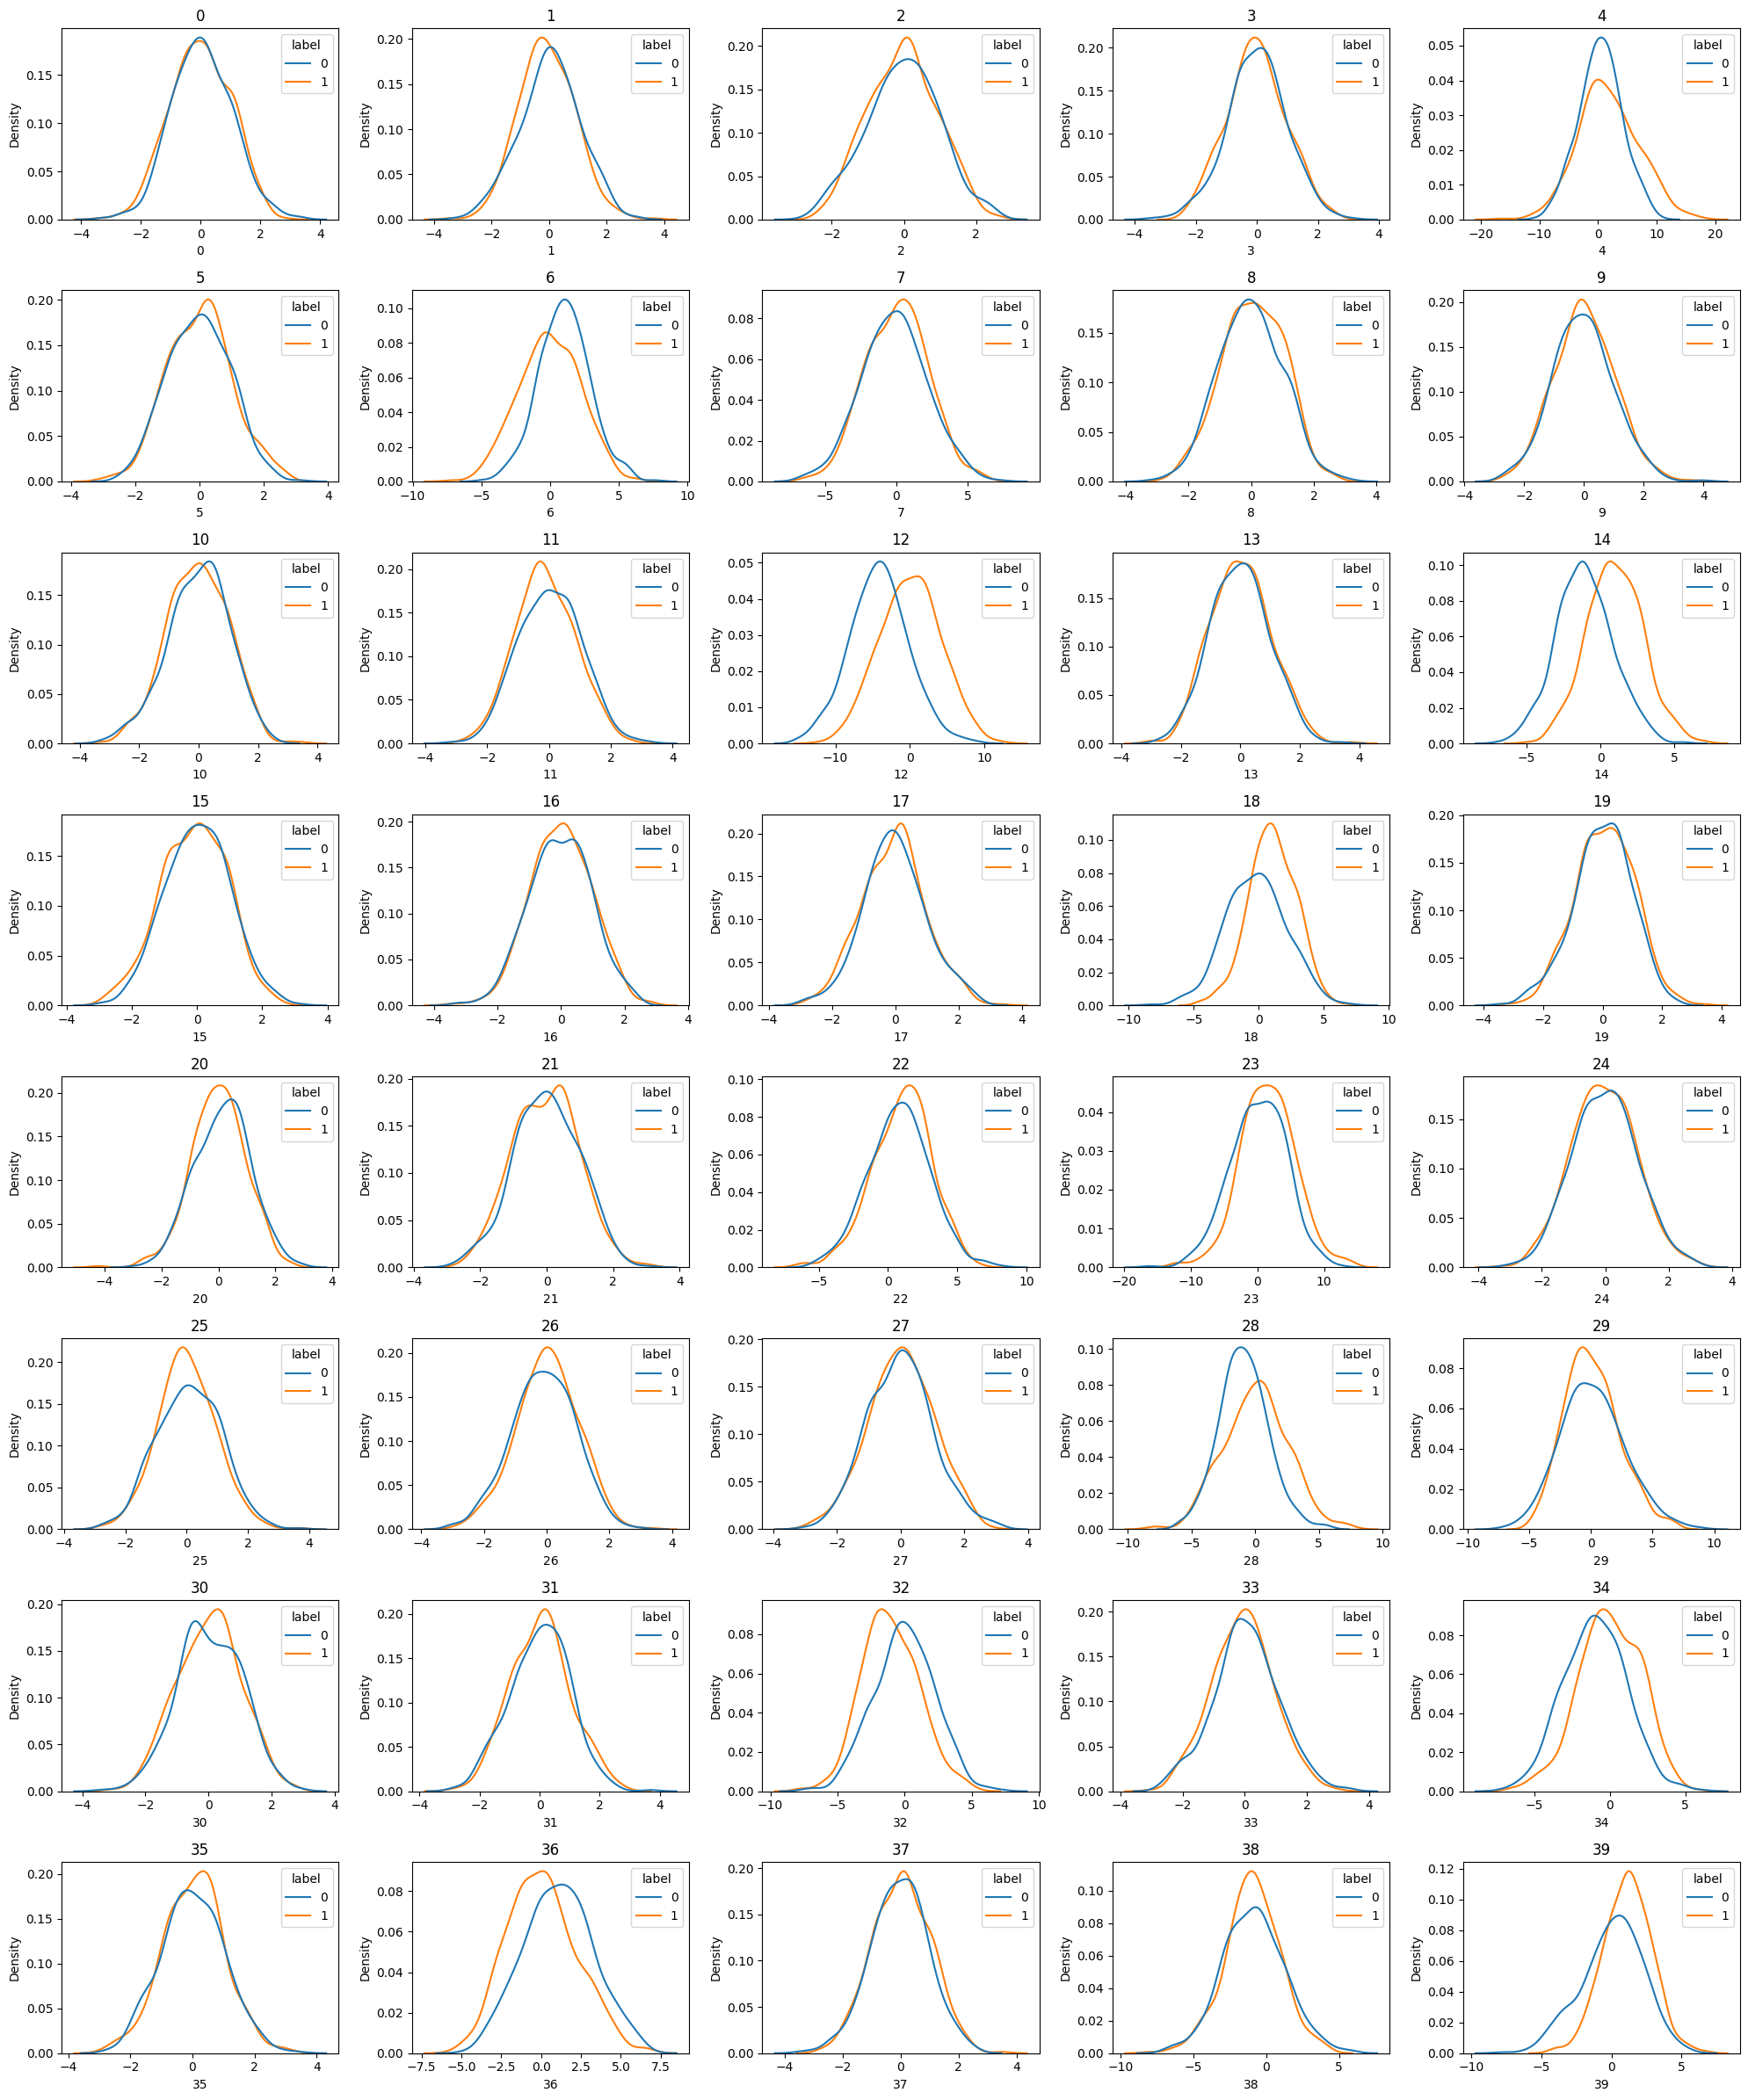

In [14]:
# оценим распределения признаков в зависимости от таргета (через hue)
def features_vis_depends_target(X):
    fig, ax = plt.subplots(8, 5, figsize=(20, 24))
    ax = ax.flatten()
    for i, col in enumerate(X.drop(columns='label').columns):
        sns.kdeplot(x=X[col], hue=X['label'], ax=ax[i]);
        ax[i].set_title(col)

    plt.tight_layout()


features_vis_depends_target(df_train)
# визуально все распределения похожи на нормальное

In [3]:
# попробуем выбрать признаки, для которых плотности
# более-менее различаются для разных label
features = [1, 4, 5, 6, 11, 12, 14, 18, 20, 23, 25, 
            26, 28, 29, 30, 32, 34, 35, 36, 38, 39]
# в дальнейшем (перед моделированием) можем оставить только эти признаки в датафреймах через маску

**Выводы**

Все признаки числовые, их достаточно много. Необходимо рассмотреть возможность создания новых признаков

# 3. Обработка данных

Данные ранее уже разделены на признаки и таргет (X_train, y_train, X_test)

In [4]:
# y_train - это датафрейм, преобразуем его в Series, чтобы
# модели могли нормально с ним работать
y_train = y_train.loc[:, 'label']
y_train.head()

0    1
1    0
2    0
3    1
4    0
Name: label, dtype: int64

**3.1 Обработка пропусков**

Пропусков в данном датасете нет

**3.2 Работа с выбросами**

In [5]:
# определим выбросы через IQR
def outlier_count(X):
    Q25, Q75 = X.quantile(0.25, axis=0), X.quantile(0.75, axis=0)
    IQR = Q75 - Q25
    lower_bound, upper_bound = Q25 - 1.5 * IQR, Q75 + 1.5 * IQR
    
    # доля выбросов для каждого признака в процентах
    quantity = ((X >= upper_bound) | (X <= lower_bound)).sum(axis=0) / X.shape[0] * 100
    return quantity.sort_values(ascending=False)


outlier_count(X_train)
# выбросов немного

39    1.7
23    1.6
4     1.5
29    1.4
28    1.3
38    1.2
18    1.1
35    1.1
26    0.9
22    0.9
19    0.9
25    0.8
20    0.8
32    0.8
7     0.8
1     0.7
3     0.7
17    0.7
33    0.7
6     0.7
34    0.7
10    0.6
24    0.6
9     0.6
13    0.6
27    0.6
11    0.5
16    0.5
31    0.5
14    0.5
12    0.5
0     0.4
21    0.4
37    0.4
5     0.3
8     0.2
30    0.2
15    0.2
2     0.0
36    0.0
dtype: float64

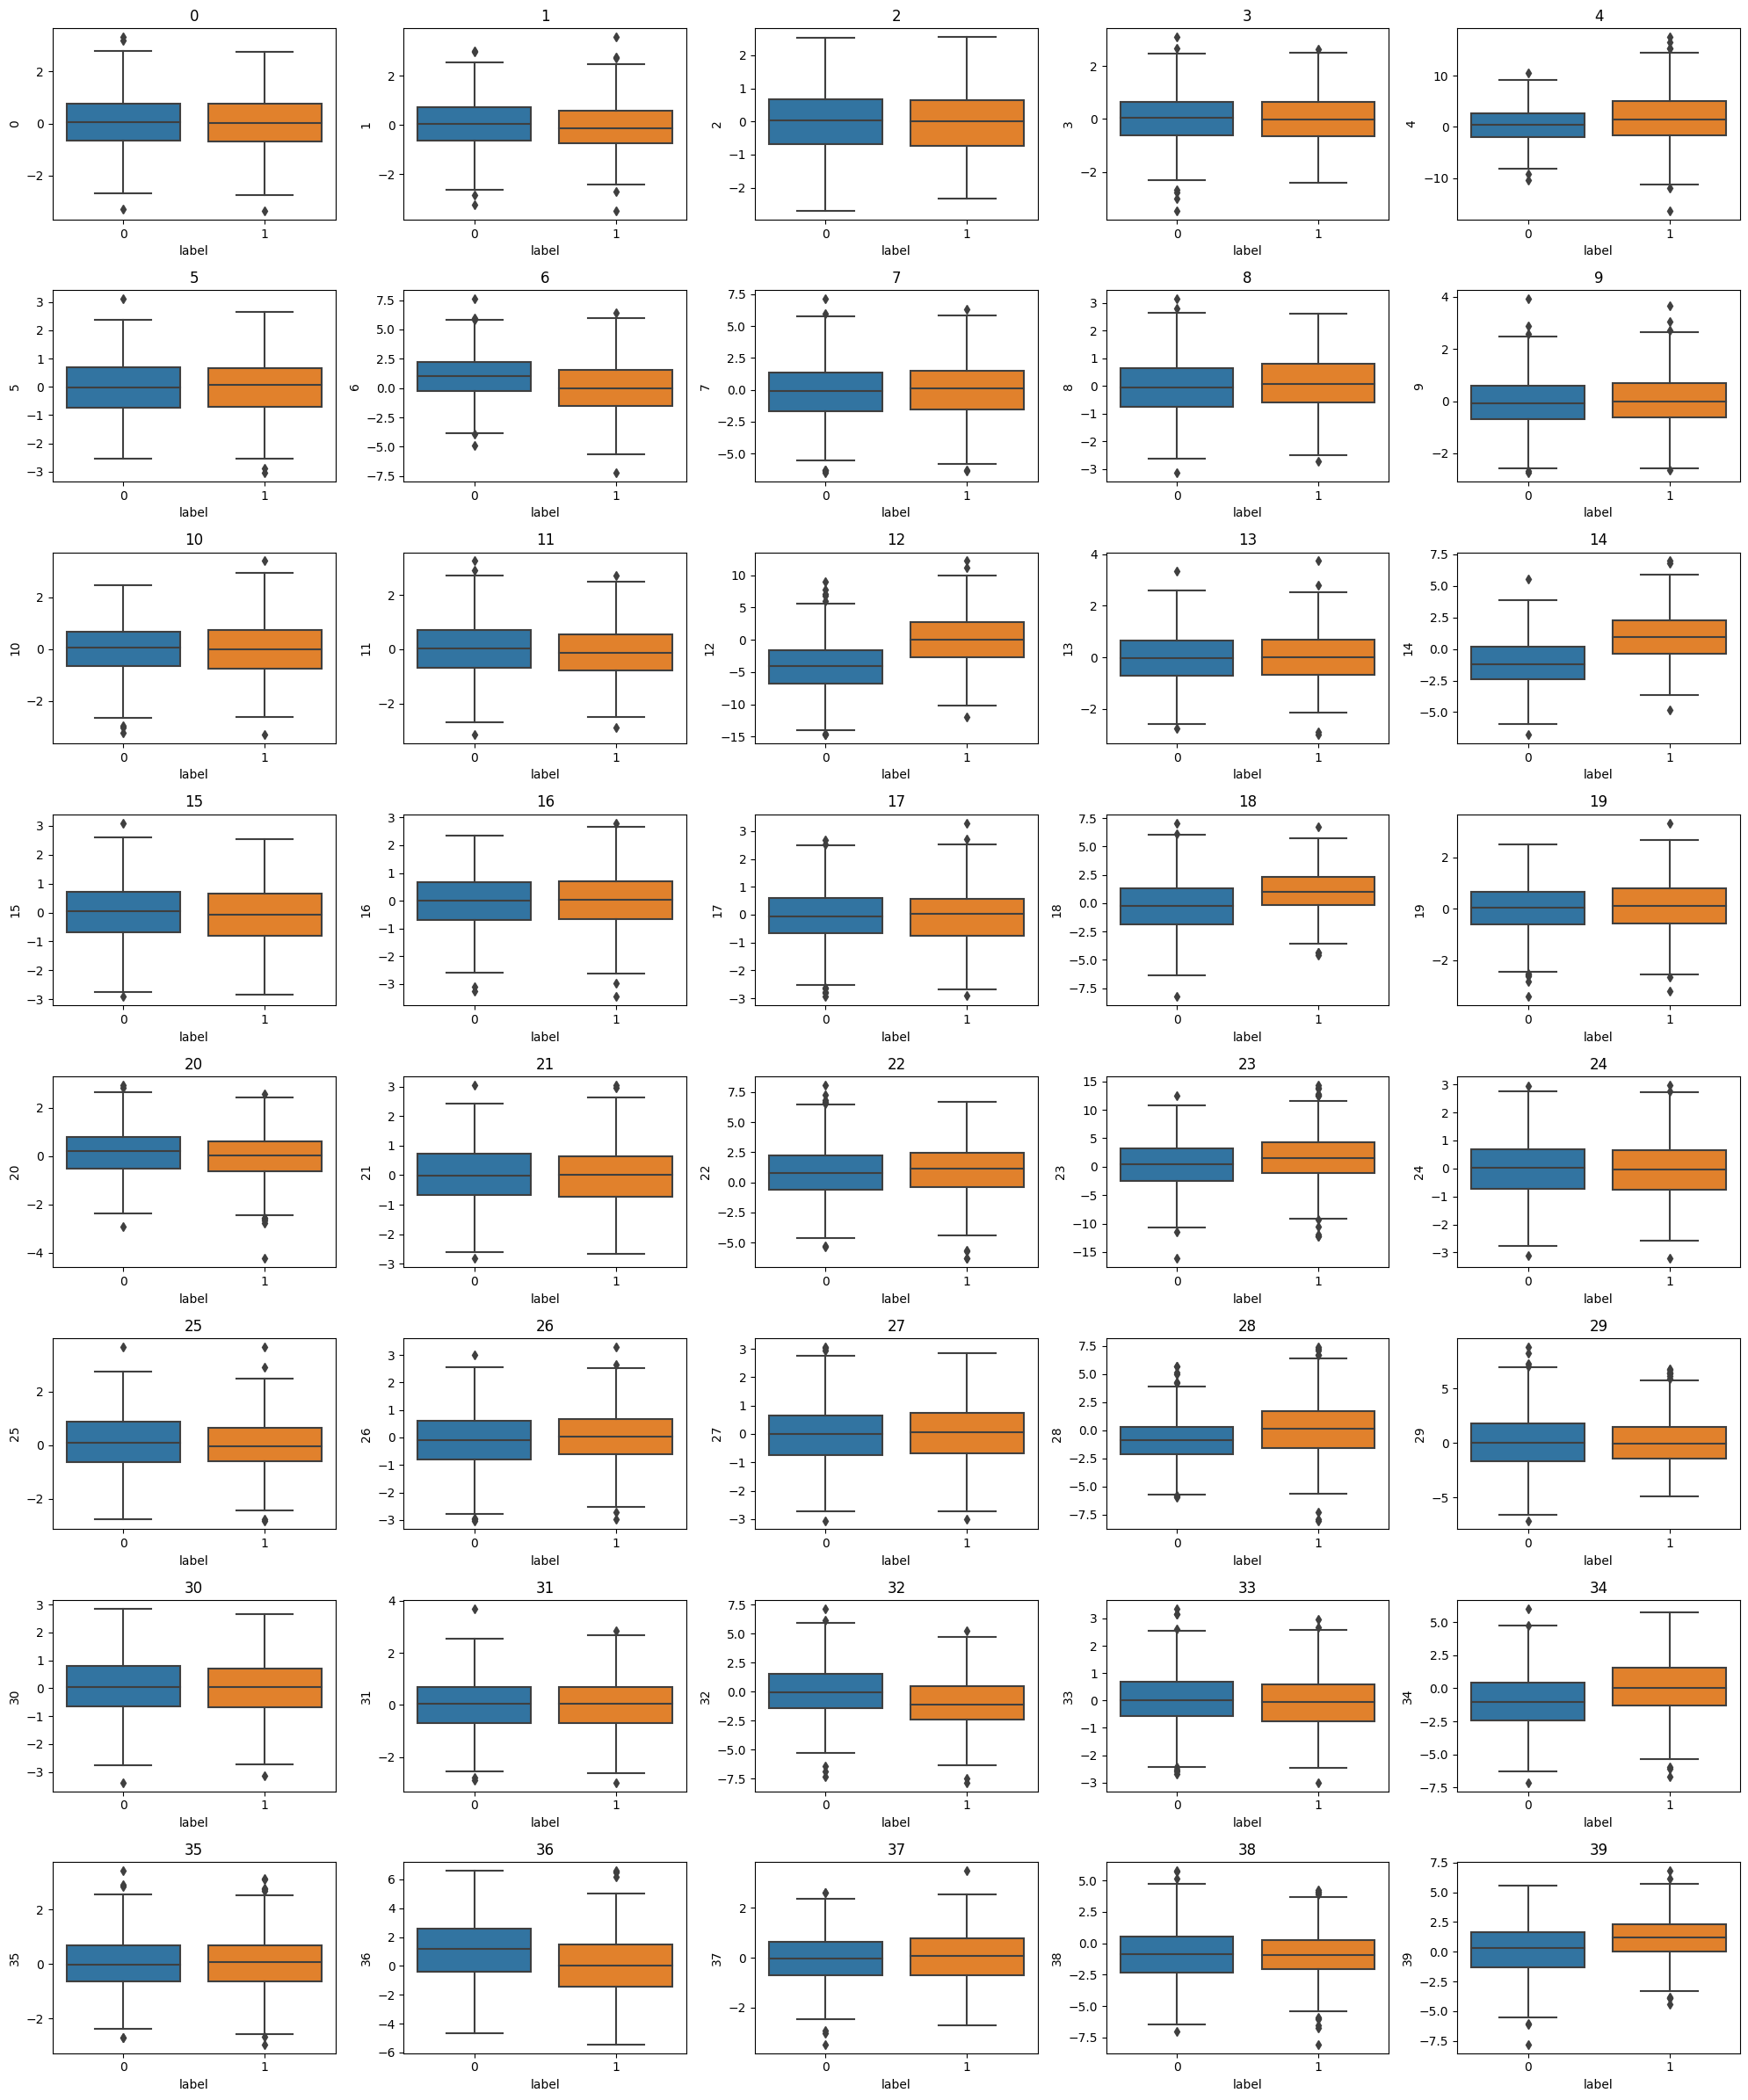

In [19]:
# посмотрим на выбросы
def outliers_vis(X):
    fig, ax = plt.subplots(8, 5, figsize=(20, 24))
    ax = ax.flatten()
    for i, col in enumerate(X.drop(columns='label').columns):
        sns.boxplot(x=X['label'], y=X[col], ax=ax[i]);
        ax[i].set_title(col)
        
    plt.tight_layout()


outliers_vis(df_train)

In [6]:
# создадим маску, убирающую выбросы через IQR
# ее можно будет применить перед этапом моделирования в случае удаления выбросов

def outlier_remove(X):
    Q25, Q75 = X.quantile(0.25, axis=0), X.quantile(0.75, axis=0)
    IQR = Q75 - Q25
    lower_bound, upper_bound = Q25 - 1.5 * IQR, Q75 + 1.5 * IQR
    
    # маска, соответствующая значениям без выбросов в данных столбцах
    mask = ((X >= lower_bound) & (X <= upper_bound)).all(axis=1)
    return mask

mask_for_outliers = outlier_remove(X_train)
# доля оставшихся данных (в % от исходных)
mask_for_outliers.sum() / df_train.shape[0] * 100

75.3

**3.3 Создание новых признаков**

Попробуем создать новые признаки через PolynomialFeatures

In [9]:
# эту ячейку можно закомментировать, если не хотим добавлять полиномиальные признаки
# from sklearn.preprocessing import PolynomialFeatures

# при interaction_only=True создаются только признаки взаимодействия
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# X_train = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out())
# X_test = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out())

**3.4 Кодирование категориальных переменных**

Категориальных переменных в данном датасете нет

**3.5 Масштабирование и преобразование числовых признаков**

In [7]:
# сначала посмотрим, насколько числовые признаки близки к нормальному распределению
from scipy.stats import kstest, shapiro, skew 

def norm_distr_check(X):
    df_norm_distr = pd.DataFrame(columns=['Критерий Колмогорова-Смирнова (p-value)', 
                                          'Критерий Шапиро-Уилка (p-value)', 
                                          'Коэффициент асимметрии']
                                            ) # пустой фрейм под результаты
    for col in X.columns:
        df_norm_distr.loc[col, 'Критерий Колмогорова-Смирнова (p-value)'] = kstest(X[col], 'norm').pvalue
        df_norm_distr.loc[col, 'Критерий Шапиро-Уилка (p-value)'] = shapiro(X[col]).pvalue
        df_norm_distr.loc[col, 'Коэффициент асимметрии'] = skew(X[col])
        
    return df_norm_distr


norm_distr_check(X_train)
# многие признаки проходят тесты на нормальность распределения
# дополнительно менять форму распределений не будем

,Критерий Колмогорова-Смирнова (p-value),Критерий Шапиро-Уилка (p-value),Коэффициент асимметрии
0,0.116374,0.63618,-0.007452
1,0.771325,0.999804,0.005833
2,0.525365,0.042035,-0.015642
3,0.39264,0.816679,-0.02492
4,0.0,0.001368,0.233513
5,0.709815,0.49694,0.053166
6,0.0,0.409167,-0.127535
7,0.0,0.884387,0.00422
8,0.205064,0.273549,-0.032162
9,0.867096,0.252231,0.145532


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [8]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.271694,-1.183412,1.555777,-1.210073,0.925265,0.217014,0.900554,0.731639,-0.077955,0.658265,...,-0.871410,-0.645377,-0.576450,0.298091,1.903665,0.679793,1.229941,-2.730228,-0.885572,-0.248677
1,-1.190511,0.351139,0.995287,-1.322617,0.243958,-0.146686,-0.436490,1.190929,-0.791829,-0.089025,...,-0.841033,-0.010905,1.152986,0.469876,-0.016107,0.386427,0.106214,1.209835,1.125967,-1.187240
2,1.157622,-0.383785,0.093134,-2.300095,0.565748,0.096352,-0.138780,-1.874007,-1.210629,-1.220826,...,-0.628156,0.726468,-1.258713,0.849944,-1.069674,-1.605605,0.496264,0.651454,-0.019700,1.163161
3,1.535729,-0.547152,-0.860645,-0.620088,0.448222,0.886648,-0.311336,2.033736,1.011781,-1.075128,...,0.981376,1.251553,-1.312129,-1.031019,1.243569,1.520225,0.987951,0.209498,0.748291,0.623135
4,-0.633738,-0.610045,1.161480,-0.031054,0.528553,-0.005750,0.446783,-1.905931,-1.786693,0.800827,...,0.477930,-1.824829,0.473942,-0.189268,-2.009724,-1.543292,0.567400,0.866404,-0.495767,-0.098374


In [9]:
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.761832,-0.214974,-0.533745,0.265371,0.144913,-0.024486,-0.859122,1.620675,-0.693579,-0.869347,...,-0.289119,-0.247110,-0.506122,-0.457927,0.112780,-0.701140,-0.022151,0.003826,0.234261,1.080473
1,-0.396612,0.553456,0.107448,0.782448,-0.039038,2.593004,1.513791,0.767194,-0.790069,-1.208714,...,-0.989097,0.550721,-0.740582,-1.566261,0.312486,-2.938746,0.034321,-1.482033,0.408336,-0.775633
2,-0.113086,0.176482,0.413648,-1.210048,0.133920,-0.255278,-0.888836,0.507125,1.569358,0.231219,...,-0.791718,-0.028069,0.897786,0.484773,-1.442998,0.776113,-0.997023,1.262633,-0.423842,0.569519
3,-0.705742,0.517636,1.938919,0.224202,-1.118864,-0.098507,1.718217,-0.084059,-1.540539,-1.054444,...,0.927625,2.361397,0.183700,0.290871,1.313815,1.214274,-0.956669,-0.132487,-0.068333,-1.738775
4,0.322760,0.734820,-0.462913,-1.800355,-0.819945,1.094119,2.104541,-1.459173,-0.786318,0.205286,...,0.227369,-2.066795,-0.728391,0.376341,0.440618,-0.243437,0.329705,-0.530533,1.671215,-0.278925


In [10]:
# финальная проверка на корректность данных
X_train_scaled.info()
print('-' * 100)
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [11]:
X_train_scaled.isnull().sum().sum(), X_test_scaled.isnull().sum().sum()

(0, 0)

**3.6 Конструирование признаков**

Были добавлены признаки, являющиеся произведениями исходных (опционально).

Попробуем применить PCA, чтобы оценить вклад признаков

In [12]:
from sklearn.decomposition import PCA

pca = PCA(10)
pca.fit(X_train_scaled)

# процент дисперсии, объясняемый каждым из выбранных компонентов (собств. числа ковариационной матрицы)
pca.explained_variance_ratio_
# с учетом малого числа исходных признаков и низкой корреляции между ними применение PCA нецелесообразно

array([0.07185529, 0.06223186, 0.04385554, 0.03870533, 0.03515921,
       0.03328068, 0.03056919, 0.02977769, 0.02930319, 0.02857783])

In [13]:
# применим L1-регуляризацию, чтобы определить важные признаки
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.coef_
# единственным важным признаком Lasso считает признак 12

array([-0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.00207012,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ])

In [14]:
# оставим только признаки features
# эту ячейку можно закомментировать
# X_train_scaled = X_train_scaled[features]
# X_test_scaled = X_test_scaled[features]

**3.7 Удаление выбросов**

Удалим выбросы, использую ранее полученную маску

In [11]:
# X_train_scaled = X_train_scaled[mask_for_outliers]
# y_train = y_train[mask_for_outliers]

# 4. Моделирование и оценка результата

Можно попробовать максимизировать несколько метрик через optuna (не только accuracy), но в этом случае не получится вывести один лучший trial. Нужно смотреть на практике, будет ли это лучше, чем просто максимизировать accuracy

**4.1 SVM**

Подбор гиперпараметров SVM через optuna зависает, поэтому не применяем SVM



**4.2 Random Forest**

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier

scores = pd.DataFrame() # пустой фрейм под все модели

def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20, step=1)
    rf_optuna = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, 
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf, random_state=42)
    # вариант для максимизации только accuracy
    score = cross_val_score(rf_optuna, X_train_scaled, y_train, cv=4).mean()
    return score
    # вариант для максимизации суммы метрик классификации (переменная score возвращает словарь с результатами метрик)
    # score = cross_validate(rf_optuna, X_train_scaled, y_train, cv=4, 
    #                        scoring=['accuracy', 'precision', 'recall'])
    # return (score['test_accuracy'] + score['test_precision'] + score['test_recall']).mean()


def model_score(model):
    # здесь оценим все метрики классификации
    score = cross_validate(model, X_train_scaled, y_train, cv=4, 
                           scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
    return {k: v.mean() for k, v in score.items()}


study = optuna.create_study(direction='maximize', study_name='Random Forest')
study.optimize(objective, n_trials=100)

rf_optuna_score = study.best_value
rf_optuna_params = study.best_params

scores.loc['Random Forest', 'Score'] = rf_optuna_score
scores.loc['Random Forest', 'Model_params'] = str([f'{k}: {v}' for k, v in rf_optuna_params.items()])

In [ ]:
rf_optuna_params
# с максимизацией accuracy
# rf_optuna_params = {'criterion': 'entropy', 'n_estimators': 370, 'min_samples_split': 9, 'min_samples_leaf': 2}
# с максимизацией суммы метрик
# rf_optuna_params = {'criterion': 'gini', 'n_estimators': 320, 'min_samples_split': 14, 'min_samples_leaf': 3}
# с максимизацией accuracy и удалением выбросов
# rf_optuna_params = {'criterion': 'log_loss', 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2}
# с максимизацией accuracy и только признаками features
# rf_optuna_params = {'criterion': 'gini', 'n_estimators': 330, 'min_samples_split': 2, 'min_samples_leaf': 3}

In [ ]:
rf = RandomForestClassifier(criterion='gini', n_estimators=330,
                            min_samples_split=2, min_samples_leaf=3,
                            random_state=42)
model_score(rf)

In [20]:
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
submission_rf = pd.DataFrame({"Id": range(1, len(y_pred_rf) + 1),
                              "Solution": y_pred_rf})
submission_rf.to_csv("submission_rf.csv", index=False)
print('✅ submission_rf.csv created successfully!')

# результат на test - 0.86587 без удаления выбросов с максимизацией только accuracy (public score)
# результат на test - 0.86065 без удаления выбросов с максимизацией суммы метрик (public score)
# результат на test - 0.85655 с удалением выбросов с максимизацией только accuracy (public score)
# результат на test - 0.86997 без удаления выбросов с признаками features с максимизацией только accuracy (public score)

✅ submission_rf.csv created successfully!


**4.3 XGBoost**

In [ ]:
from xgboost import XGBClassifier

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    max_depth = trial.suggest_int('max_depth', 2, 8, step=1)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1, log=True)
    booster = trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart'])
    xgboost_optuna = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   learning_rate=learning_rate, booster=booster,
                                   verbosity=0, random_state=42)
    # вариант для максимизации только accuracy
    score = cross_val_score(xgboost_optuna, X_train_scaled, y_train, cv=4).mean()
    return score
    # вариант для максимизации суммы метрик классификации (переменная score возвращает словарь с результатами метрик)
    # score = cross_validate(xgboost_optuna, X_train_scaled, y_train, cv=4, 
    #                        scoring=['accuracy', 'precision', 'recall'])
    # return (score['test_accuracy'] + score['test_precision'] + score['test_recall']).mean()


study = optuna.create_study(direction='maximize', study_name='XGBoost')
study.optimize(objective, n_trials=100)

xgboost_optuna_score = study.best_value
xgboost_optuna_params = study.best_params

scores.loc['XGBoost', 'Score'] = xgboost_optuna_score
scores.loc['XGBoost', 'Model_params'] = str([f'{k}: {v}' for k, v in xgboost_optuna_params.items()])

In [ ]:
xgboost_optuna_params
# с максимизацией accuracy
# xgboost_optuna_params = {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.06081084826779107, 'booster': 'gbtree'}
# с максимизацией суммы метрик
# xgboost_optuna_params = {'n_estimators': 470, 'max_depth': 5, 'learning_rate': 0.3021727313756771, 'booster': 'gbtree'}
# с максимизацией accuracy и удалением выбросов
# xgboost_optuna_params = {'n_estimators': 290, 'max_depth': 7, 'learning_rate': 0.06438244731981173, 'booster': 'gbtree'}
# с максимизацией accuracy и признаками features
# xgboost_optuna_params = {'n_estimators': 470, 'max_depth': 6, 'learning_rate': 0.0520840569536642, 'booster': 'gbtree'}

In [ ]:
xgboost = XGBClassifier(n_estimators=470, max_depth=6,
                        learning_rate=0.0520840569536642, booster='gbtree',
                        verbosity=0, random_state=42)
model_score(xgboost)

In [26]:
xgboost.fit(X_train_scaled, y_train)
y_pred_xgboost = xgboost.predict(X_test_scaled)
submission_xgboost = pd.DataFrame({"Id": range(1, len(y_pred_xgboost) + 1),
                                   "Solution": y_pred_xgboost})
submission_xgboost.to_csv("submission_xgboost.csv", index=False)
print('✅ submission_xgboost.csv created successfully!')

# результат на test - 0.88599 без удаления выбросов с максимизацией только accuracy (public score)
# результат на test - 0.88040 без удаления выбросов с максимизацией суммы метрик (public score)
# результат на test - 0.87146 с удалением выбросов с максимизацией только accuracy (public score)
# результат на test - 0.88524 без удаления выбросов с признаками features с максимизацией только accuracy (public score)

✅ submission_xgboost.csv created successfully!


**4.4 GradienBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

def objective(trial):
    loss = trial.suggest_categorical('loss', ['log_loss', 'exponential'])
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=10)
    criterion = trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error'])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20, step=1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20, step=1)
    max_depth = trial.suggest_int('max_depth', 1, 10, step=1)
    grad_boost_optuna = GradientBoostingClassifier(loss=loss, learning_rate=learning_rate, 
                                                    n_estimators=n_estimators, criterion=criterion,
                                                    min_samples_split=min_samples_split,
                                                    min_samples_leaf=min_samples_leaf, max_depth=max_depth, 
                                                    random_state=42)
    # вариант для максимизации только accuracy
    score = cross_val_score(grad_boost_optuna, X_train_scaled, y_train, cv=4).mean()
    return score
    # вариант для максимизации суммы метрик классификации (переменная score возвращает словарь с результатами метрик)
    # score = cross_validate(grad_boost_optuna, X_train_scaled, y_train, cv=4, 
    #                        scoring=['accuracy', 'precision', 'recall'])
    # return (score['test_accuracy'] + score['test_precision'] + score['test_recall']).mean()


study = optuna.create_study(direction='maximize', study_name='Gradient Boosting')
study.optimize(objective, n_trials=100)

grad_boost_optuna_score = study.best_value
grad_boost_optuna_params = study.best_params

scores.loc['GradientBoosting', 'Score'] = grad_boost_optuna_score
scores.loc['GradientBoosting', 'Model_params'] = str([f'{k}: {v}' for k, v in grad_boost_optuna_params.items()])

In [ ]:
grad_boost_optuna_params
# с максимизацией accuracy
# grad_boost_optuna_params = {'loss': 'exponential', 'learning_rate': 0.2798878604677373, 'n_estimators': 410,
#                             'criterion': 'squared_error', 'min_samples_split': 19, 'min_samples_leaf': 17, 'max_depth': 10}
# с максимизацией суммы метрик
# grad_boost_optuna_params = {'loss': 'exponential', 'learning_rate': 0.16436927053544434, 'n_estimators': 180,
#                             'criterion': 'friedman_mse', 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 9}
# с максимизацией accuracy и удалением выбросов
# grad_boost_optuna_params = {'loss': 'exponential', 'learning_rate': 0.23573345118958516, 'n_estimators': 430,
#                             'criterion': 'squared_error', 'min_samples_split': 12, 'min_samples_leaf': 13, 'max_depth': 5}
# с максимизацией accuracy и признаками features
# grad_boost_optuna_params = {'loss': 'exponential', 'learning_rate': 0.15372842070105866, 'n_estimators': 140,
#                             'criterion': 'squared_error', 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_depth': 3}

In [ ]:
grad_boost = GradientBoostingClassifier(loss='exponential', learning_rate=0.15372842070105866, 
                                        n_estimators=140, criterion='squared_error',
                                        min_samples_split=12,
                                        min_samples_leaf=7, max_depth=7, 
                                        random_state=42)
model_score(grad_boost)

In [31]:
grad_boost.fit(X_train_scaled, y_train)
y_pred_grad_boost = grad_boost.predict(X_test_scaled)
submission_grad_boost = pd.DataFrame({"Id": range(1, len(y_pred_grad_boost) + 1),
                                      "Solution": y_pred_grad_boost})
submission_grad_boost.to_csv("submission_grad_boost.csv", index=False)
print('✅ submission_grad_boost.csv created successfully!')

# результат на test -  0.89307 без удаления выбросов с максимизацией только accuracy (public score)
# результат на test -  0.88785 без удаления выбросов с максимизацией суммы метрик (public score)
# результат на test - 0.88859 с удалением выбросов с максимизацией только accuracy (public score)
# результат на test - 0.89008 без удаления выбросов с признаками features с максимизацией только accuracy (public score)

✅ submission_grad_boost.csv created successfully!


**4.5 CatBoost**

In [ ]:
from catboost import CatBoostClassifier

def objective(trial):
    iterations = trial.suggest_int('iterations', 100, 500, step=10)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1, log=True)
    depth = trial.suggest_int('depth', 1, 10, step=1)
    cat_boost_optuna = CatBoostClassifier(iterations=iterations, learning_rate=learning_rate,
                                          depth=depth, verbose=False, random_state=42)
    # вариант для максимизации только accuracy
    score = cross_val_score(cat_boost_optuna, X_train_scaled, y_train, cv=4).mean()
    return score
    # вариант для максимизации суммы метрик классификации (переменная score возвращает словарь с результатами метрик)
    # score = cross_validate(cat_boost_optuna, X_train_scaled, y_train, cv=4, 
    #                        scoring=['accuracy', 'precision', 'recall'])
    # return (score['test_accuracy'] + score['test_precision'] + score['test_recall']).mean()


study = optuna.create_study(direction='maximize', study_name='CatBoost')
study.optimize(objective, n_trials=100)

cat_boost_optuna_score = study.best_value
cat_boost_optuna_params = study.best_params

scores.loc['CatBoost', 'Score'] = cat_boost_optuna_score
scores.loc['CatBoost', 'Model_params'] = str([f'{k}: {v}' for k, v in cat_boost_optuna_params.items()])

In [ ]:
cat_boost_optuna_params
# с максимизацией accuracy
# cat_boost_optuna_params = {'iterations': 270, 'learning_rate': 0.2556748222988955, 'depth': 8}
# с максимизацией суммы метрик
# cat_boost_optuna_params = {'iterations': 460, 'learning_rate': 0.040465943580953734, 'depth': 7}
# с максимизацией accuracy и удалением выбросов
# cat_boost_optuna_params = {'iterations': 450, 'learning_rate': 0.2369097867400214, 'depth': 6}
# с максимизацией accuracy и признаками features
# cat_boost_optuna_params = {'iterations': 380, 'learning_rate': 0.09011424716500688, 'depth': 9}

In [ ]:
cat_boost = CatBoostClassifier(iterations=380, learning_rate=0.09011424716500688,
                               depth=9, verbose=False, random_state=42)
model_score(cat_boost)

In [35]:
cat_boost.fit(X_train_scaled, y_train)
y_pred_cat_boost = cat_boost.predict(X_test_scaled)
submission_cat_boost = pd.DataFrame({"Id": range(1, len(y_pred_cat_boost) + 1),
                                     "Solution": y_pred_cat_boost})
submission_cat_boost.to_csv("submission_cat_boost.csv", index=False)
print('✅ submission_cat_boost.csv created successfully!')

# результат на test - 0.89418 без удаления выбросов с максимизацией только accuracy (public score)
# результат на test - 0.89493 без удаления выбросов с максимизацией суммы метрик (public score)
# результат на test - 0.88338 с удалением выбросов с максимизацией только accuracy (public score)
# результат на test - 0.89679 без удаления выбросов с признаками features с максимизацией только accuracy (public score)

✅ submission_cat_boost.csv created successfully!


**4.6 Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

def objective(trial):
    hidden_layer_sizes = trial.suggest_int('hidden_layer_sizes', 2, 102, step=5)
    # единственным адекватным выбором для функции активации скрытых слоев
    # кажется ReLU, но попробуем разные варианты
    activation = trial.suggest_categorical('activation', ['logistic', 'tanh', 'relu'])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
    alpha = trial.suggest_float('alpha', 1e-5, 1, log=True)
    # параметр max_iter ставим большим, т.к. иначе можно не достичь сходимости
    mlp_optuna = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                               solver=solver, alpha=alpha, max_iter=10 ** 6, random_state=42)
    # вариант для максимизации только accuracy
    score = cross_val_score(mlp_optuna, X_train_scaled, y_train, cv=4).mean()
    return score
    # вариант для максимизации суммы метрик классификации (переменная score возвращает словарь с результатами метрик)
    # score = cross_validate(mlp_optuna, X_train_scaled, y_train, cv=4, 
    #                        scoring=['accuracy', 'precision', 'recall'])
    # return (score['test_accuracy'] + score['test_precision'] + score['test_recall']).mean()


study = optuna.create_study(direction='maximize', study_name='MLPClassifier')
study.optimize(objective, n_trials=100)

mlp_optuna_score = study.best_value
mlp_optuna_params = study.best_params

scores.loc['MLPClassifier', 'Score'] = mlp_optuna_score
scores.loc['MLPClassifier', 'Model_params'] = str([f'{k}: {v}' for k, v in mlp_optuna_params.items()])

In [ ]:
mlp_optuna_params
# с максимизацией accuracy
# mlp_optuna_params = {'hidden_layer_sizes': 102, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.6750078313333133}
# с максимизацией суммы метрик
# mlp_optuna_params = {'hidden_layer_sizes': 102, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.5194203285201897}
# с максимизацией accuracy и удалением выбросов
# mlp_optuna_params = {'hidden_layer_sizes': 77, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.9673514184254196}
# с максимизацией accuracy и признаками features
# mlp_optuna_params = {'hidden_layer_sizes': 47, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.2716447594860389}

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=47, activation='relu', solver='adam',
                    alpha=0.2716447594860389, max_iter=10 ** 6, random_state=42)
model_score(mlp)

In [40]:
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
submission_mlp = pd.DataFrame({"Id": range(1, len(y_pred_mlp) + 1),
                               "Solution": y_pred_mlp})
submission_mlp.to_csv("submission_mlp.csv", index=False)
print('✅ submission_mlp.csv created successfully!')

# результат на test - 0.88599 без удаления выбросов с максимизацией только accuracy (public score)
# результат на test - 0.88412 без удаления выбросов с максимизацией суммы метрик (public score)
# результат на test - 0.86922 с удалением выбросов с максимизацией только accuracy (public score)
# результат на test - 0.90126 без удаления выбросов с признаками features с максимизацией только accuracy (public score)

✅ submission_mlp.csv created successfully!


In [41]:
scores

,Score,Model_params
Random Forest,0.874,"['criterion: gini', 'n_estimators: 330', 'min_..."
XGBoost,0.904,"['n_estimators: 470', 'max_depth: 6', 'learnin..."
GradientBoosting,0.907,"['loss: exponential', 'learning_rate: 0.153728..."
CatBoost,0.908,"['iterations: 380', 'learning_rate: 0.09011424..."
MLPClassifier,0.899,"['hidden_layer_sizes: 47', 'activation: relu',..."


Можно сделать cледующие выводы:
1. Для данного датасета максимизация только accruacy (а не суммы нескольких метрик) в основном дает несколько лучшие результаты;
2. Удаление выбросов ухудшает результат;
3. Удаление некоторых признаков (когда оставляем только features) может улучшать результат в зависимости от применяемой модели.